# 문제제기

In [277]:
import warnings
warnings.filterwarnings('ignore')

## 1. '도박' 키워드
- 2019~2022 현재까지 '도박' 키워드 중 '청소년'이 차지하는 비율 비교

In [636]:
from bs4 import BeautifulSoup 
import urllib
import urllib.request as rq
import pandas as pd

global news_df, keyword

def News(keyword, ex_keyword, num, start_date, end_date):
    global news_df, url,page_num
    
    keyword = urllib.parse.quote(keyword) #퍼센트인코딩 #URL에 문자를 표현하는 인코딩방법(URL에 한글이 섞이면 오류 발생)
    ex_keyword = urllib.parse.quote(ex_keyword) #퍼센트인코딩 #URL에 문자를 표현하는 인코딩방법(URL에 한글이 섞이면 오류 발생)
    
    news_df = pd.DataFrame(columns=['title','url']) 
    
    page_num=1
    i=0 #크롤링한 기사의 수
    while num > i:
        url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query='+keyword+ '+-' + ex_keyword + '&photo=3'+'&pd=3'+ '&ds='+start_date+'&de='+end_date+'&start='+str(page_num)
        html = rq.urlopen(url)
        bs = BeautifulSoup(html,'html.parser')
        texts = bs.find_all(class_='news_tit')

        for text in texts:
            news_df.loc[i,'title'] = text.get_text()
            news_df.loc[i,'url'] = text['href']
            i +=1
            if i == num:
                break
        page_num +=10
    return news_df

#검색키워드, 제외키워드, num, start_date, end_date 
# News('도박','양현석', 1000,'2019.01.01','2019.12.31')
# News('도박','공무원', 1000,'2020.01.01','2020.12.31')
# News('도박','이재명', 1000,'2021.01.01','2021.12.31')
News('도박','공무원', 600,'2022.01.01','2022.07.31')

,title,url
0,"“100배 수익”… 개미들, 도박처럼 코인선물 베팅",https://www.donga.com/news/article/all/2022072...
1,"강원랜드 도박중독 회복자, 직접 재배한 감자 지역 나눔 '훈훈'",http://www.kado.net/news/articleView.html?idxn...
2,[단독] 전문가들 “서해 피살 공무원 도박중독 판단 불가”,https://news.kmib.co.kr/article/view.asp?arcid...
3,도박장 된 게임 불법 사설서버... 리니지·바람의나라 등 다양,http://www.fnnews.com/news/202207041804526633
4,100만원 넣고 30배 먹는다…주식판 깨지자 도박판 열렸다,http://www.edaily.co.kr/news/newspath.asp?news...
...,...,...
595,"[이도경의 에듀 서치] 교육부 해체 실험… “좋아, 빠르게” 밀어붙일 사안은...",http://news.kmib.co.kr/article/view.asp?arcid=...
596,[세상읽기] 푸틴은 ‘21세기 히틀러’이다,https://www.khan.co.kr/opinion/column/article/...
597,"니얼 퍼거슨 ""인류의 다음 위협 2~3년 뒤 온다…대만 둘러싼 전쟁 우려""",http://news.mk.co.kr/newsRead.php?no=257747&ye...
598,투자 실패로 수억 날리고 또 클릭… “주식 중독입니다”,http://www.segye.com/content/html/2022/02/14/2...


In [637]:
import re
target = news_df['title'].values #Series.values = array
title_list = target.tolist() # array > list
text = ' '.join(title_list) #list들을 공백으로 구분해서 연결
text = re.sub('[^가-힣]+',' ',text) #한글 이외는 공백으로 대체

In [638]:
#konlpy(콘엘피) = 형태소 분석
from konlpy.tag import Okt
from collections import Counter
okt = Okt() #객체형성

morph = okt.pos(text) #형태소로 변환 #word= 단어 / tag=품사
morph

noun_list =[]
stop_word = ['도박','불법','범죄','만원','단독']
for word, tag in morph: #word= 단어 / tag=품사
    if(tag=='Noun') & (len(word)>1): #noun이고 단어가 1글자 이상인것(1글자는 보통 조사이기때문)
        if word not in stop_word:
            noun_list.append(word)

count = Counter(noun_list) #단어별 숫자세주기

#2019
# data19 =dict(count.most_common()) #빈도수 정리 내림차
# series = pd.Series(data19)
# df=pd.DataFrame(series, columns=['cnt'])
# student_2019 = df.loc['청소년'].cnt + df.loc['학생'].cnt

#2020
# data20 =dict(count.most_common()) #빈도수 정리 내림차
# series = pd.Series(data20)
# df=pd.DataFrame(series, columns=['cnt'])
# student_2020 =df.loc['청소년'].cnt+ df.loc['학생'].cnt

# 2021
# data21 =dict(count.most_common()) #빈도수 정리 내림차
# series = pd.Series(data21)
# df=pd.DataFrame(series, columns=['cnt'])
# student_2021 =df.loc['청소년'].cnt+ df.loc['학생'].cnt

# 2022
data22 =dict(count.most_common()) #빈도수 정리 내림차
series = pd.Series(data22)
df=pd.DataFrame(series, columns=['cnt'])
student_2022 =df.loc['청소년'].cnt

df

,cnt
공무원,42
월북,33
사설,33
서해,29
수사,26
...,...
클릭,1
바르셀로나,1
사비,1
매직,1


In [327]:
import pandas as pd
# df.to_excel('도박noun_2019.xlsx')
# df.to_excel('도박noun_2020.xlsx')
# df.to_excel('도박noun_2021.xlsx')
df.to_excel('도박noun_2022.xlsx')

## 2019

In [ ]:
data19.pop('트럼프')

(-0.5, 1499.5, 999.5, -0.5)

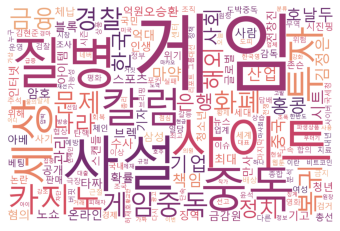

In [451]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf', background_color='white',
                     colormap='flare',width=1500,height=1000).generate_from_frequencies(data19)
plt.imshow(wordcloud)
plt.axis('off')

## 2020

In [455]:
data20.pop('트럼프')

26

(-0.5, 1499.5, 999.5, -0.5)

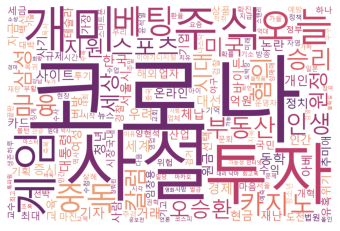

In [456]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf', background_color='white',
                     colormap='flare',width=1500,height=1000).generate_from_frequencies(data20)
plt.imshow(wordcloud)
plt.axis('off')

## 2021

In [460]:
data21.pop('칼럼')

40

(-0.5, 1499.5, 999.5, -0.5)

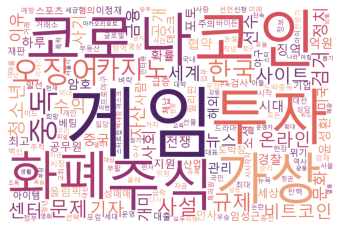

In [461]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf', background_color='white',
                     colormap='flare',width=1500,height=1000).generate_from_frequencies(data21)
plt.imshow(wordcloud)
plt.axis('off')

## 2022

(-0.5, 1499.5, 999.5, -0.5)

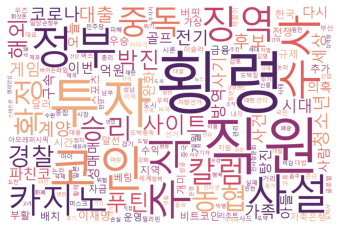

In [467]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf', background_color='white',
                     colormap='flare',width=1500,height=1000).generate_from_frequencies(data22)
plt.imshow(wordcloud)
plt.axis('off')

## 2019-2022 '도박' 중 '청소년','학생' cnt

In [468]:
student_cnt =pd.DataFrame(columns=['cnt'])
student_cnt

,cnt


In [471]:
student_cnt.loc[0,'cnt'] =student_2019
student_cnt.loc[1,'cnt'] =student_2020
student_cnt.loc[2,'cnt'] =student_2021
student_cnt.loc[3,'cnt'] =student_2022

In [472]:
student_cnt.index = student_cnt.index+2019
student_cnt

,cnt
2019,10
2020,10
2021,16
2022,10


Text(0.5, 1.0, "2019-2022상반기, '도박' 중 '청소년' 키워드")

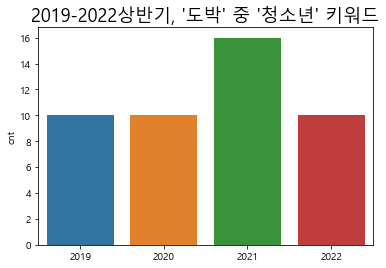

In [473]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',family="Malgun Gothic") #한글폰트

sns.barplot(x=student_cnt.index, y=student_cnt.cnt, data=student_cnt)
plt.title("2019-2022상반기, '도박' 중 '청소년' 키워드", size=18)

## 2. '청소년 불법' 키워드
- 2019~2022 현재까지 '청소년 불법' 키워드 중 '도박'이 차지하는 비율 비교

In [643]:
from bs4 import BeautifulSoup 
import urllib
import urllib.request as rq
import pandas as pd

global news_df, keyword

def News(keyword, ex_keyword, num, start_date, end_date):
    global news_df, url,page_num
    
    keyword = urllib.parse.quote(keyword) #퍼센트인코딩 #URL에 문자를 표현하는 인코딩방법(URL에 한글이 섞이면 오류 발생)
    ex_keyword = urllib.parse.quote(ex_keyword) #퍼센트인코딩 #URL에 문자를 표현하는 인코딩방법(URL에 한글이 섞이면 오류 발생)
    
    news_df = pd.DataFrame(columns=['title','url']) 
    
    page_num=1
    i=0 #크롤링한 기사의 수
    while num > i:
        url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query='+keyword+ '+-' + ex_keyword + '&photo=3'+'&pd=3'+ '&ds='+start_date+'&de='+end_date+'&start='+str(page_num)
        html = rq.urlopen(url)
        bs = BeautifulSoup(html,'html.parser')
        texts = bs.find_all(class_='news_tit')

        for text in texts:
            news_df.loc[i,'title'] = text.get_text()
            news_df.loc[i,'url'] = text['href']
            i +=1
            if i == num:
                break
        page_num +=10
    return news_df

#검색키워드, 제외키워드, num, start_date, end_date 
# News('청소년 불법','정준영', 500,'2019.01.01','2019.12.31')
# News('청소년 불법','', 500,'2020.01.01','2020.12.31')

,title,url
0,아동 성착취물 범죄자 잡고보니 절반이 10대 청소년,http://www.edaily.co.kr/news/newspath.asp?news...
1,불법촬영을 ‘놀이’로 여기는 10대… 가해자에 관대한 어른들 [심층기획-디지...,http://www.segye.com/content/html/2022/07/25/2...
2,"""年 이자만 20000%""…청소년까지 손 뻗은 불법대출",http://www.fnnews.com/news/202207131758205037
3,"“현대차 미국 자회사, 10대 미성년자 불법 고용”",https://www.khan.co.kr/world/world-general/art...
4,"""코로나로 늘어난 사교육 시장""…범정부 '불법행위 점검단' 뜬다",http://news.mt.co.kr/mtview.php?no=20220718095...
...,...,...
695,"지대범 지역정보개발원장 ""디지털전환 시대, 정부와 국민이 체감하는 성과 창...",http://www.etnews.com/20210517000081
696,"“아들아 엄카 그만 긁어라, 용돈카드 만들어줄게”",https://www.chosun.com/economy/market_trend/20...
697,시행 17개월 국회청원 “문턱 더 낮추고 책임성 높여야”,http://news.kmib.co.kr/article/view.asp?arcid=...
698,"퀵, 목숨 건 무법질주… 안전을 배달하세요",https://www.seoul.co.kr/news/newsView.php?id=2...


In [644]:
import re
target = news_df['title'].values #Series.values = array
title_list = target.tolist() # array > list
text = ' '.join(title_list) #list들을 공백으로 구분해서 연결
text = re.sub('[^가-힣]+',' ',text) #한글 이외는 공백으로 대체

In [645]:
#konlpy(콘엘피) = 형태소 분석
from konlpy.tag import Okt
from collections import Counter
okt = Okt() #객체형성

morph = okt.pos(text) #형태소로 변환 #word= 단어 / tag=품사
morph

noun_list =[]
stop_word = ['청소년','불법','범죄','만원','단독','경찰','정보','유해']
for word, tag in morph: #word= 단어 / tag=품사
    if(tag=='Noun') & (len(word)>1): #noun이고 단어가 1글자 이상인것(1글자는 보통 조사이기때문)
        if word not in stop_word:
            noun_list.append(word)

count = Counter(noun_list) #단어별 숫자세주기

#2019
# data19 =dict(count.most_common(30)) #빈도수 정리 내림차
# series = pd.Series(data19)
# df=pd.DataFrame(series, columns=['cnt'])
# student_2019_2 = df.loc['도박'].cnt

# #2020
# data20 =dict(count.most_common(30)) #빈도수 정리 내림차
# series = pd.Series(data20)
# df=pd.DataFrame(series, columns=['cnt'])
# student_2020_2 = df.loc['도박'].cnt

df

,cnt
디지털,34
성범죄,32
촬영,28
마약,27
여성,26
게임,25
코로나,22
단속,20
착취,19
온라인,19


### 2019

(-0.5, 1499.5, 999.5, -0.5)

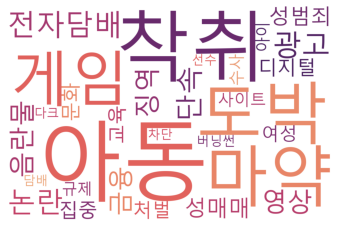

In [552]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf', background_color='white',
                     colormap='flare',width=1500,height=1000).generate_from_frequencies(data19)
plt.imshow(wordcloud)
plt.axis('off')

In [578]:
data19['아동']

24

### 2020

In [558]:
data20.pop('방지법')
data20.pop('트럼프')
data20.pop('최대')
data20.pop('세상')

10

(-0.5, 1499.5, 999.5, -0.5)

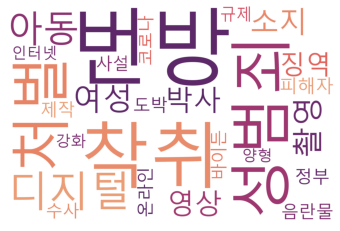

In [559]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf', background_color='white',
                     colormap='flare',width=1500,height=1000).generate_from_frequencies(data20)
plt.imshow(wordcloud)
plt.axis('off')

### 2021-2022

In [656]:
from bs4 import BeautifulSoup 
import urllib
import urllib.request as rq
import pandas as pd

global news_df

def News():
    global keyword, num, news_df, url,page_num
    
    keyword = input('검색 키워드를 입력해주세요')
    keyword = urllib.parse.quote(keyword) #퍼센트인코딩 #URL에 문자를 표현하는 인코딩방법(URL에 한글이 섞이면 오류 발생)
    num = int(input('필요한 뉴스기사의 숫자를 입력해주세요'))
    
    news_df = pd.DataFrame(columns=['title','url']) 
    
    page_num=1
    i=0 #크롤링한 기사의 수
    while num > i:
        
        url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query='+ keyword +'&photo=3'+'&start='+str(page_num)
        html = rq.urlopen(url)
        bs = BeautifulSoup(html,'html.parser')
        texts = bs.find_all(class_='news_tit')

        for text in texts:
            news_df.loc[i,'title'] = text.get_text()
            news_df.loc[i,'url'] = text['href']
            i +=1
            if i == num:
                break
        page_num +=10
    return news_df

News()

# 청소년 불법
# 700

검색 키워드를 입력해주세요 청소년 불법
필요한 뉴스기사의 숫자를 입력해주세요 700


,title,url
0,아동 성착취물 범죄자 잡고보니 절반이 10대 청소년,http://www.edaily.co.kr/news/newspath.asp?news...
1,불법촬영을 ‘놀이’로 여기는 10대… 가해자에 관대한 어른들 [심층기획-디지...,http://www.segye.com/content/html/2022/07/25/2...
2,"""年 이자만 20000%""…청소년까지 손 뻗은 불법대출",http://www.fnnews.com/news/202207131758205037
3,"“현대차 미국 자회사, 10대 미성년자 불법 고용”",https://www.khan.co.kr/world/world-general/art...
4,"""코로나로 늘어난 사교육 시장""…범정부 '불법행위 점검단' 뜬다",http://news.mt.co.kr/mtview.php?no=20220718095...
...,...,...
695,마트·편의점서 술 사기 불편해진다,http://www.munhwa.com/news/view.html?no=201403...
696,"‘이민개혁, 라티노잡기’ 경쟁 돌입",https://n.news.naver.com/mnews/article/086/000...
697,"웹하드 · P2P사업자, 유해정보 차단 노력 강화해야",http://www.etnews.com/201110190157
698,[단독]보수단체 홍보물 배포가 중·고생 자원봉사라니…,http://www.khan.co.kr/kh_news/art_view.html?ar...


In [657]:
import re
target = news_df['title'].values #Series.values = array
title_list = target.tolist() # array > list
text = ' '.join(title_list) #list들을 공백으로 구분해서 연결
text = re.sub('[^가-힣]+',' ',text) #한글 이외는 공백으로 대체

In [658]:
#konlpy(콘엘피) = 형태소 분석
from konlpy.tag import Okt
from collections import Counter
okt = Okt() #객체형성

morph = okt.pos(text) #형태소로 변환 #word= 단어 / tag=품사
morph

noun_list =[]
stop_word=['청소년','불법','적발','단속','집중','경기도','금리','점검']
for word, tag in morph: #word= 단어 / tag=품사
    if(tag=='Noun') & (len(word)>1): #noun이고 단어가 1글자 이상인것(1글자는 보통 조사이기때문)
        if word not in stop_word:
            noun_list.append(word)

count = Counter(noun_list) #단어별 숫자세주기

data =dict(count.most_common(30)) #빈도수 정리 내림차
series = pd.Series(data)

df=pd.DataFrame(series, columns=['cnt'])
student_202122_2 = df.loc['도박'].cnt

In [660]:
data.pop('트럼프')
data.pop('추방')
data.pop('바이든')

22

(-0.5, 1499.5, 999.5, -0.5)

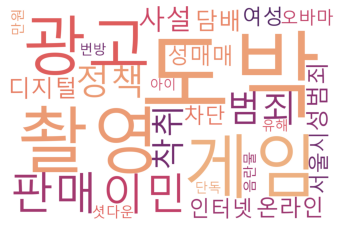

In [661]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf', background_color='white',
                     colormap='flare',width=1500,height=1000).generate_from_frequencies(data)
plt.imshow(wordcloud)
plt.axis('off')

### 2019-2022 '청소년 불법' 중 '도박' cnt

In [662]:
student_cnt2 =pd.DataFrame(columns=['cnt'])
student_cnt2

,cnt


In [663]:
student_cnt2.loc[0,'cnt'] =student_2019_2
student_cnt2.loc[1,'cnt'] =student_2020_2
student_cnt2.loc[2,'cnt'] =student_202122_2

In [664]:
student_cnt2

,cnt
0,16
1,12
2,52


In [665]:
student_cnt2.index = student_cnt2.index+2019
student_cnt2

,cnt
2019,16
2020,12
2021,52


Text(0.5, 1.0, "2019-2022상반기, '청소년 불법' 중 '도박' 키워드")

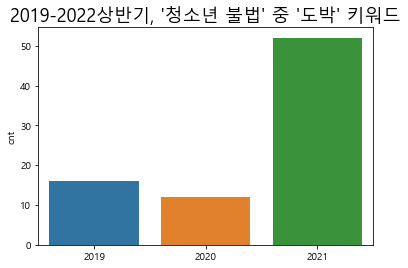

In [666]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',family="Malgun Gothic") #한글폰트

sns.barplot(x=student_cnt2.index, y=student_cnt2.cnt, data=student_cnt2)
plt.title("2019-2022상반기, '청소년 불법' 중 '도박' 키워드", size=18)

# 원인

## 1. '청소년 도박 원인' 키워드
- 청소년 도박에 영향을 미치는 요인들

In [383]:
from bs4 import BeautifulSoup 
import urllib
import urllib.request as rq
import pandas as pd

global news_df

def News():
    global keyword, num, news_df, url,page_num
    
    keyword = input('검색 키워드를 입력해주세요')
    keyword = urllib.parse.quote(keyword) #퍼센트인코딩 #URL에 문자를 표현하는 인코딩방법(URL에 한글이 섞이면 오류 발생)
    num = int(input('필요한 뉴스기사의 숫자를 입력해주세요'))
    
    news_df = pd.DataFrame(columns=['title','url']) 
    
    page_num=1
    i=0 #크롤링한 기사의 수
    while num > i:
        url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query='+keyword+'&start='+str(page_num)
        html = rq.urlopen(url)
        bs = BeautifulSoup(html,'html.parser')
        texts = bs.find_all(class_='news_tit')

        for text in texts:
            news_df.loc[i,'title'] = text.get_text()
            news_df.loc[i,'url'] = text['href']
            i +=1
            if i == num:
                break
        page_num +=10
    return news_df

News()

# 청소년 도박 원인
# 1000

검색 키워드를 입력해주세요 청소년 도박 원인
필요한 뉴스기사의 숫자를 입력해주세요 1000


,title,url
0,"청소년불법도박, 어떠한 경우에도 선처 불가능해",http://www.globalepic.co.kr/view.php?ud=202207...
1,'아이 어른 할 것 없이 베팅'…한탕주의 도박 늪에 빠진 충북,https://www.news1.kr/articles/?4742532
2,"소년범죄, 원인부터 살피고 대책 논의를",https://www.hani.co.kr/arti/opinion/because/10...
3,"""도박사이트 운영자 무관용 처벌… 중독 예방 교육 병행"" [범람하는 불법도박...",http://www.fnnews.com/news/202206301803336103
4,[공공돋보기] 학교폭력 도화선 '청소년 도박 중독',http://www.00news.co.kr/news/articleView.html?...
...,...,...
995,[충청브리핑] 바른정당 의원 14명 ‘洪 지지’ 탈당 결의,http://www.newdaily.co.kr/news/article.html?no...
996,"[취재] 아이와 부모의 게임 소통? ""함께 공감하고 대화해요""",http://www.inven.co.kr/webzine/news/?news=192577
997,"시중銀, 가상화폐거래소에 가상계좌 380만개 남발",http://decenter.sedaily.com/NewsView/1RUH6DWV01
998,아이와 스마트폰 신경전 끝내는 법,http://www.sisain.co.kr/?mod=news&act=articleV...


In [384]:
import re
target = news_df['title'].values #Series.values = array
title_list = target.tolist() # array > list
text = ' '.join(title_list) #list들을 공백으로 구분해서 연결
text = re.sub('[^가-힣]+',' ',text) #한글 이외는 공백으로 대체

In [478]:
#konlpy(콘엘피) = 형태소 분석
from konlpy.tag import Okt
from collections import Counter
okt = Okt() #객체형성

morph = okt.pos(text) #형태소로 변환 #word= 단어 / tag=품사
morph

noun_list =[]
stop_words = ['청소년','불법']
for word, tag in morph: #word= 단어 / tag=품사
    if(tag=='Noun') & (len(word)>1): #noun이고 단어가 1글자 이상인것(1글자는 보통 조사이기때문)
        if word not in stop_words:
            noun_list.append(word)

count = Counter(noun_list) #단어별 숫자세주기
data =dict(count.most_common(10)) #빈도수 정리 내림차(15위까지만)
series = pd.Series(data)
df=pd.DataFrame(series, columns=['cnt'])


- wordcloud

(-0.5, 1499.5, 999.5, -0.5)

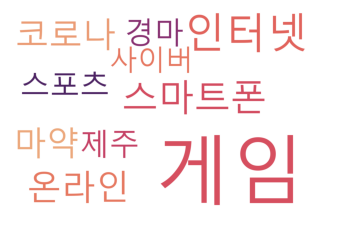

In [386]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf', background_color='white',
                     colormap='flare',width=1500,height=1000).generate_from_frequencies(data)
plt.imshow(wordcloud)
plt.axis('off')

- 정리
- 게임, 스포츠, 경마 : 청소년 도박은 게임형태로 제공됨
- 코로나, 스마트폰, 인터넷 : 코로나 19 이후, 스마트폰과 인터넷 사용이 과다해지고 도박 광고에 노출됨
- 제주 : 제주도의 청소년 도박은 가장 심각한 수준

# 실태 파악

## 1. 지식인 '청소년 도박' > 도움의 필요성
- description의 verb추출

In [133]:
import pandas as pd
data_df = pd.DataFrame(columns=['title', 'description'])

In [134]:
data_df

,title,description


In [155]:
# 네이버 검색 API예제는 블로그를 비롯 전문자료까지 호출방법이 동일하므로 blog검색만 대표로 예제를 올렸습니다.
# 네이버 검색 Open API 예제 - 블로그 검색
import os
import sys
import urllib.request

client_id = "LIJD8mAPbkTMJZsQSK0k"
client_secret = "lfFpbSRs5V"

# query = urllib.parse.quote(input('검색 질의'))
query = urllib.parse.quote('청소년 도박')

# url = "https://openapi.naver.com/v1/search/kin.xml?query=" + query +'&display='+ str(100) + '&start='+str(1)
# url = "https://openapi.naver.com/v1/search/kin.xml?query=" + query +'&display='+ str(100) + '&start='+str(101)
# url = "https://openapi.naver.com/v1/search/kin.xml?query=" + query +'&display='+ str(100) + '&start='+str(201)
# url = "https://openapi.naver.com/v1/search/kin.xml?query=" + query +'&display='+ str(100) + '&start='+str(301)
# url = "https://openapi.naver.com/v1/search/kin.xml?query=" + query +'&display='+ str(100) + '&start='+str(401)
# url = "https://openapi.naver.com/v1/search/kin.xml?query=" + query +'&display='+ str(100) + '&start='+str(501)
# url = "https://openapi.naver.com/v1/search/kin.xml?query=" + query +'&display='+ str(100) + '&start='+str(601)
# url = "https://openapi.naver.com/v1/search/kin.xml?query=" + query +'&display='+ str(100) + '&start='+str(701)
# url = "https://openapi.naver.com/v1/search/kin.xml?query=" + query +'&display='+ str(100) + '&start='+str(801)
url = "https://openapi.naver.com/v1/search/kin.xml?query=" + query +'&display='+ str(100) + '&start='+str(901)

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    response_body=response_body.decode('utf-8')
else:
    print("Error Code:" + rescode)

In [156]:
from bs4 import BeautifulSoup
bs = BeautifulSoup(response_body, 'html.parser')

titles = bs.find_all('title')
texts = bs.find_all('description')
display = bs.find('display')
# texts = bs.find_all('description')

# i=0
for title in titles:
    data_df.loc[i,'title'] =title.get_text()
    data_df.loc[i,'title'] = re.sub('[^가-힣]',' ',data_df.loc[i,'title'])
    i+= 1

# j=0
for text in texts:
    data_df.loc[j,'description'] =text.get_text()
    data_df.loc[j,'description'] = re.sub('[^가-힣]',' ',data_df.loc[j,'description'])
    j+= 1

data_df

,title,description
0,청소년 도박,
1,청소년 도박 문제점 알려주세요 급해요,내일 국어에서 발표하기를 하는데요 청소년 도박 문제점 좀 알려주세요 ...
2,청소년 도박 처벌,부터 도박 했고요 넣다 뺏다 천만원 정도 한것같은데 경찰에 걸리면...
3,청소년 도박 중독,원래 도박 같은건 한번도 하지 않았는데 주변 친구들로 진짜...
4,청소년 도박 빚,이제 고 인데 도박 을 하다 친구들에게 거짓말을 쳐서 돈을 빌리고 하다 ...
...,...,...
1005,온라인으로 돈버는 방법,불법 도박 말고요 안녕하세요 청소년 근로보호센...
1006,아들이 던파에빠져 만원을 도와주세요,아니죠 이긴사람이 가져가죠 그겁니다 아드님은 도박 에 실패한겁니다...
1007,제가 스크린골프장에서 알바를 했었는데요 제가,도박 으로 게임치러 오는사람이 많아요 하루에 만원 쓰는 사...
1008,아는 지인이 중고사기로 곧 재판을 봅니다,또한 그 돈을 불법 도박 사이트에서 사용하였습니다 그리하여 이 사...


In [211]:
import re
target =data_df['description'].values #Series.values = array
title_list = target.tolist() # array > list
text = ' '.join(title_list) #list들을 공백으로 구분해서 연결
text = re.sub('[^가-힣]+',' ',text) #한글 이외는 공백으로 대체

In [164]:
text1 = text

In [207]:
import pandas as pd
stopword = pd.read_csv('stopword_korean.csv', header=None)
stopword=stopword.values.tolist()
stop_word=[]
for i in range(len(stopword)):
    stop_word += stopword[i]
stop_word

['입니다', '있습니다']

In [209]:
#konlpy(콘엘피) = 형태소 분석
from konlpy.tag import Okt
from collections import Counter
okt = Okt() #객체형성

morph = okt.pos(text) #형태소로 변환 #word= 단어 / tag=품사
morph

verb_list =[]
for word, tag in morph: #word= 단어 / tag=품사
    if (tag=='noun') | (tag=='verb') |(tag=='Adjective'):
        if word not in stop_word:
            verb_list.append(word)

count = Counter(verb_list) #단어별 숫자세주기
data =dict(count.most_common()) #빈도수 정리 내림차(15위까지만)
series = pd.Series(data)
df=pd.DataFrame(series, columns=['cnt'])

In [210]:
data

{'있는': 97,
 '안녕하세요': 82,
 '같은': 71,
 '어떻게': 64,
 '있고': 38,
 '아니라': 31,
 '어떤': 28,
 '있어': 27,
 '없습니다': 27,
 '많은': 26,
 '같습니다': 21,
 '그런': 21,
 '이런': 21,
 '없는': 20,
 '있나요': 19,
 '있으므로': 18,
 '있는지': 18,
 '가능한': 18,
 '같은데': 16,
 '아니면': 15,
 '있어요': 15,
 '있다고': 15,
 '있는데': 15,
 '인해': 14,
 '있을까요': 14,
 '같아요': 12,
 '있을': 12,
 '어떠한': 12,
 '좋은': 12,
 '있다': 12,
 '많다': 12,
 '아니고': 11,
 '가능합니다': 11,
 '있으니': 11,
 '아니죠': 11,
 '없어서': 11,
 '아닌': 10,
 '안된다고': 10,
 '있다는': 10,
 '같아서': 10,
 '험악한': 10,
 '안되는': 9,
 '아닙니다': 9,
 '나쁜': 9,
 '힘든': 9,
 '불우한': 9,
 '높습니다': 9,
 '그럼': 9,
 '같': 9,
 '같은거는': 9,
 '없어요': 8,
 '인한': 8,
 '부탁드립니다': 8,
 '있으면': 8,
 '있기': 8,
 '엄격한': 8,
 '자세하게': 8,
 '없는데': 8,
 '가능한가요': 8,
 '의하여': 8,
 '솔직히': 7,
 '안됩니다': 7,
 '없고': 7,
 '같은거': 7,
 '있으며': 7,
 '미': 7,
 '같네요': 7,
 '없으면': 7,
 '있지만': 6,
 '힘듭니다': 6,
 '같아': 6,
 '많습니다': 6,
 '단순히': 6,
 '있어서': 6,
 '상당히': 6,
 '궁금합니다': 6,
 '나쁜건': 6,
 '가깝죠': 6,
 '가볍게': 6,
 '그러니': 6,
 '없음': 6,
 '의한': 6,
 '같은건': 5,
 '없나요': 5,
 '없지만': 5,
 '의해': 5,
 '없어': 5,
 '이러한': 5

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf', background_color='white',
                     colormap='flare',width=1500,height=1000).generate_from_frequencies(data)
plt.imshow(wordcloud)
plt.axis('off')

## '청소년 도박 예방' 키워드 분석

In [395]:
from bs4 import BeautifulSoup 
import urllib
import urllib.request as rq
import pandas as pd

global news_df

def News():
    global keyword, num, news_df, url,page_num
    
    keyword = input('검색 키워드를 입력해주세요')
    keyword = urllib.parse.quote(keyword) #퍼센트인코딩 #URL에 문자를 표현하는 인코딩방법(URL에 한글이 섞이면 오류 발생)
    num = int(input('필요한 뉴스기사의 숫자를 입력해주세요'))
    
    news_df = pd.DataFrame(columns=['title','url']) 
    
    page_num=1
    i=0 #크롤링한 기사의 수
    while num > i:
        url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query='+keyword+'&start='+str(page_num)
        html = rq.urlopen(url)
        bs = BeautifulSoup(html,'html.parser')
        texts = bs.find_all(class_='news_tit')

        for text in texts:
            news_df.loc[i,'title'] = text.get_text()
            news_df.loc[i,'url'] = text['href']
            i +=1
            if i == num:
                break
        page_num +=10
    return news_df

News()

검색 키워드를 입력해주세요 청소년 도박 예방
필요한 뉴스기사의 숫자를 입력해주세요 1000


,title,url
0,"문경대 학생상담센터·구미중독관리통합지원센터, 중독예방 업무협약",http://www.kyongbuk.co.kr/news/articleView.htm...
1,"""공원은 밤 8시부터 순찰"" 청소년이 원하는 치안정책은…고교생 참여",https://www.news1.kr/articles/4756348
2,"세종충북도박예방치유센터, 옥천 청소년 도박문제 해결 '맞손'",http://www.newsis.com/view/?id=NISX20220720_00...
3,남편 도박 빚에 극단적 선택…일가족 3명 숨진 채 발견,http://www.segye.com/content/html/2022/07/25/2...
4,"청소년불법도박, 어떠한 경우에도 선처 불가능해",http://www.globalepic.co.kr/view.php?ud=202207...
...,...,...
995,"도박문제관리센터 부산센터, '청소년 도박 예방' 연수 실시",http://www.sisaon.co.kr/news/articleView.html?...
996,"당진시보건소, 한국도박문제관리 대전센터와 업무 협약 가져",http://www.viva100.com/main/view.php?key=20200...
997,"당진시보건소, 한국도박문제관리센터와 업무 협약 가져",http://www.ggilbo.com/news/articleView.html?id...
998,"부안군, 청소년 안전망 위기대응 예방교육 마련",https://www.ibuan.com/news/articleView.html?id...


In [396]:
import re
target = news_df['title'].values #Series.values = array
title_list = target.tolist() # array > list
text = ' '.join(title_list) #list들을 공백으로 구분해서 연결
text = re.sub('[^가-힣]+',' ',text) #한글 이외는 공백으로 대체

In [421]:
#konlpy(콘엘피) = 형태소 분석
from konlpy.tag import Okt
from collections import Counter
okt = Okt() #객체형성

morph = okt.pos(text) #형태소로 변환 #word= 단어 / tag=품사
morph

noun_list =[]
stop_words = ['도박', '청소년', '치료', '중독','문제','한국','도박중독','실시','업무','불법','게임','예방','서울','경남','대상','복지','제주','학생','위험','충북','단박','전북','경기']
for word, tag in morph: #word= 단어 / tag=품사
    if(tag=='Noun') & (len(word)>1): #noun이고 단어가 1글자 이상인것(1글자는 보통 조사이기때문)
        if word not in stop_words:
            noun_list.append(word)

count = Counter(noun_list) #단어별 숫자세주기
data =dict(count.most_common(20)) #빈도수 정리 내림차(30위까지만)
series = pd.Series(data)
df=pd.DataFrame(series, columns=['cnt'])
df

,cnt
센터,459
관리,271
교육,217
협약,88
교육청,83
캠페인,65
상담,64
학교,61
온라인,53
활동,53


In [408]:
import pandas as pd
# df.to_excel('청소년_도박_예방.xlsx')
df.to_excel('청소년_도박_치료.xlsx')

- wordcloud

(-0.5, 1499.5, 999.5, -0.5)

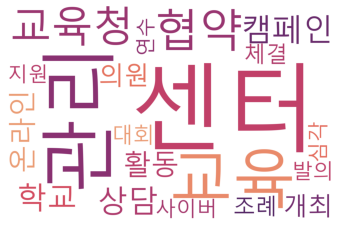

In [422]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf', background_color='white',
                     colormap='flare',width=1500,height=1000).generate_from_frequencies(data)
plt.imshow(wordcloud)
plt.axis('off')

## 상담복지센터 연도별 추이 확인

### 2020년 청소년상담복지센터 현황

In [1]:
from urllib.request import Request, urlopen
from urllib.parse import urlencode, quote_plus
import pandas as pd
import json

query = "https://api.odcloud.kr/api/3084537/v1/uddi:f2ff9ec8-65c6-4a96-9446-86bf9a516b92_201908191803?page=1&perPage=1000&returnType=json&serviceKey=BR3g48qP54cPHeDIIypKuN55f0dmJlM5zyN1XoYEFe6pT75UjgycQicJlbBuR8jp5MmbhLKNABSMZoKJNeYRNg%3D%3D"
request = Request(query)
request.get_method = lambda:'GET'
response_body = urlopen(request).read()
#print(response_body)

response_dict = json.loads(response_body.decode('utf-8'))
#print(response_dict)
#print(response_dict.keys())

items = response_dict['data']

df_2020 = pd.DataFrame(items)
df_2020

,센터명,전화번호,주소,지역
0,서울시청소년상담복지센터,02-2285-1318,(04543) 서울시 중구 을지로 11길 23 7층,서울
1,노원구청소년상담복지센터,02-2091-1387,(06138) 서울시 노원구 덕릉로777 2층,서울
2,양천구청소년상담복지센터,02-2646-8341,(07991) 서울시 양천구 목동서로 143 목동청소년수련관 1층,서울
3,영등포구청소년상담복지센터,02-2676-6114,(07317) 서울시 영등포구 도영로22길 36 해광빌딩 2층,서울
4,동작구청소년상담복지센터,02-845-1388,(07062) 서울시 동작구 여의대방로 20길 33 시립보라매청소년수련관 슬기동 2층,서울
...,...,...,...,...
245,합천군청소년상담복지센터,055-932-5499,(50236) 경남 합천군 합천읍 중앙로2길 15,경남
246,제주특별자치도청소년상담복지센터,064-759-9951,(63222) 제주도 제주시 구남로 7길 4 2층,제주
247,서귀포시청소년상담복지센터,064-763-9191,(63590) 제주도 서귀포시 중앙로 94. 3층,제주
248,제주시청소년상담복지센터,064-725-7999,"(63097) 제주도 제주시 남녕로 39, 3층",제주


In [2]:
# 행, 열 순으로 출력
df_2020.shape

(250, 4)

In [3]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   센터명     250 non-null    object
 1   전화번호    250 non-null    object
 2   주소      250 non-null    object
 3   지역      250 non-null    object
dtypes: object(4)
memory usage: 7.9+ KB


In [4]:
# null값 확인
df_2020.isnull().sum()

센터명     0
전화번호    0
주소      0
지역      0
dtype: int64

In [5]:
df_2020.columns

Index(['센터명', '전화번호', '주소', '지역'], dtype='object')

In [6]:
df_2020['지역'].count()

250

In [7]:
df_2020['지역'].value_counts()

경기    48
서울    26
경남    23
전남    23
경북    22
충남    16
전북    15
충북    13
강원    13
부산    13
대구    10
인천     9
울산     6
광주     6
대전     3
제주     3
세종     1
Name: 지역, dtype: int64

In [8]:
df2020=pd.DataFrame(df_2020,columns=['지역','연도'])
df2020 = df2020.fillna('2020')
#df2020

### 2021년 청소년상담복지센터 현황

In [9]:
from urllib.request import Request, urlopen
from urllib.parse import urlencode, quote_plus
import pandas as pd
import json

query = "https://api.odcloud.kr/api/3084537/v1/uddi:c9021633-7e5d-4c6b-b73a-f51fedcacc93?page=1&perPage=1000&returnType=json&serviceKey=BR3g48qP54cPHeDIIypKuN55f0dmJlM5zyN1XoYEFe6pT75UjgycQicJlbBuR8jp5MmbhLKNABSMZoKJNeYRNg%3D%3D"
request = Request(query)
request.get_method = lambda:'GET'
response_body = urlopen(request).read()
#print(response_body)

response_dict = json.loads(response_body.decode('utf-8'))
#print(response_dict)
#print(response_dict.keys())

items = response_dict['data']

df_2021 = pd.DataFrame(items)
df_2021

,데이터기준일자,시군구명,시도명,시설ID,시설명,전화번호,주소
0,2021-07-30,중구,서울특별시,6060,서울시청소년상담복지센터,02-2285-1318,(04543) 서울시 중구 을지로 11길 23 7층
1,2021-07-30,노원구,서울특별시,6063,노원구청소년상담복지센터,02-2091-1386,(06138) 서울시 노원구 덕릉로777 2층
2,2021-07-30,양천구,서울특별시,6065,양천구청소년상담복지센터,02-2646-8341,(07991) 서울시 양천구 목동서로 143 목동청소년수련관 1층
3,2021-07-30,영등포구,서울특별시,6068,영등포구청소년상담복지센터,02-844-0924,(07317) 서울시 영등포구 도영로22길 36 해광빌딩 2층
4,2021-07-30,동작구,서울특별시,6071,동작구청소년상담복지센터,02-834-1355,(07062) 서울시 동작구 여의대방로 20길 33 시립보라매청소년센터 슬기동 2층
...,...,...,...,...,...,...,...
228,2021-07-30,합천군,경상남도,6617,합천군청소년상담복지센터,055-930-3911,(50231) 경남 합천군 합천읍 옥산로 96-5
229,2021-07-30,제주시,제주특별자치도,6618,제주특별자치도청소년상담복지센터,064-759-9950,(63222) 제주도 제주시 구남로 7길 4 2층
230,2021-07-30,서귀포시,제주특별자치도,6620,서귀포시청소년상담복지센터,064-763-9190,(63590) 제주도 서귀포시 중앙로 94. 3층
231,2021-07-30,제주시,제주특별자치도,6622,제주시청소년상담복지센터,064-725-3799,(63097) 제주도 제주시 남녕로 39 3층


In [10]:
# 행, 열 순으로 출력
df_2021.shape

(233, 7)

In [11]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   데이터기준일자  233 non-null    object
 1   시군구명     232 non-null    object
 2   시도명      233 non-null    object
 3   시설ID     233 non-null    int64 
 4   시설명      233 non-null    object
 5   전화번호     232 non-null    object
 6   주소       233 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.9+ KB


In [12]:
# null값 확인
df_2021.isnull().sum()

데이터기준일자    0
시군구명       1
시도명        0
시설ID       0
시설명        0
전화번호       1
주소         0
dtype: int64

In [13]:
# 데이터프레임 전체 열 이름 조회
df_2021.columns

Index(['데이터기준일자', '시군구명', '시도명', '시설ID', '시설명', '전화번호', '주소'], dtype='object')

In [14]:
# 열 정렬하기
df_2021 = df_2021[['시도명', '시군구명', '시설명', '시설ID', '주소', '전화번호', '데이터기준일자']]
df_2021.head()

,시도명,시군구명,시설명,시설ID,주소,전화번호,데이터기준일자
0,서울특별시,중구,서울시청소년상담복지센터,6060,(04543) 서울시 중구 을지로 11길 23 7층,02-2285-1318,2021-07-30
1,서울특별시,노원구,노원구청소년상담복지센터,6063,(06138) 서울시 노원구 덕릉로777 2층,02-2091-1386,2021-07-30
2,서울특별시,양천구,양천구청소년상담복지센터,6065,(07991) 서울시 양천구 목동서로 143 목동청소년수련관 1층,02-2646-8341,2021-07-30
3,서울특별시,영등포구,영등포구청소년상담복지센터,6068,(07317) 서울시 영등포구 도영로22길 36 해광빌딩 2층,02-844-0924,2021-07-30
4,서울특별시,동작구,동작구청소년상담복지센터,6071,(07062) 서울시 동작구 여의대방로 20길 33 시립보라매청소년센터 슬기동 2층,02-834-1355,2021-07-30


In [15]:
df_2021['시도명'].count()

233

In [16]:
df_2021['시도명'].value_counts()

경기도        32
서울특별시      25
경상남도       22
전라남도       22
경상북도       21
충청남도       16
부산광역시      16
전라북도       15
충청북도       13
강원도        13
인천광역시      10
대구광역시       9
울산광역시       6
광주광역시       6
대전광역시       3
제주특별자치도     3
세종특별자치시     1
Name: 시도명, dtype: int64

In [17]:
# 2020년과 값 통일
df_2021 = df_2021.replace({'시도명' : "경기도"}, "경기")
df_2021 = df_2021.replace({'시도명' : "서울특별시"}, "서울")
df_2021 = df_2021.replace({'시도명' : "경상남도"}, "경남")
df_2021 = df_2021.replace({'시도명' : "전라남도"}, "전남")
df_2021 = df_2021.replace({'시도명' : "경상북도"}, "경북")
df_2021 = df_2021.replace({'시도명' : "충청남도"}, "충남")
df_2021 = df_2021.replace({'시도명' : "전라북도"}, "전북")
df_2021 = df_2021.replace({'시도명' : "충청북도"}, "충북")
df_2021 = df_2021.replace({'시도명' : "강원도"}, "강원")
df_2021 = df_2021.replace({'시도명' : "부산광역시"}, "부산")
df_2021 = df_2021.replace({'시도명' : "인천광역시"}, "인천")
df_2021 = df_2021.replace({'시도명' : "대구광역시"}, "대구")
df_2021 = df_2021.replace({'시도명' : "울산광역시"}, "울산")
df_2021 = df_2021.replace({'시도명' : "광주광역시"}, "광주")
df_2021 = df_2021.replace({'시도명' : "대전광역시"}, "대전")
df_2021 = df_2021.replace({'시도명' : "제주특별자치도"}, "제주")
df_2021 = df_2021.replace({'시도명' : "세종특별자치시"}, "세종")

df_2021.head()

,시도명,시군구명,시설명,시설ID,주소,전화번호,데이터기준일자
0,서울,중구,서울시청소년상담복지센터,6060,(04543) 서울시 중구 을지로 11길 23 7층,02-2285-1318,2021-07-30
1,서울,노원구,노원구청소년상담복지센터,6063,(06138) 서울시 노원구 덕릉로777 2층,02-2091-1386,2021-07-30
2,서울,양천구,양천구청소년상담복지센터,6065,(07991) 서울시 양천구 목동서로 143 목동청소년수련관 1층,02-2646-8341,2021-07-30
3,서울,영등포구,영등포구청소년상담복지센터,6068,(07317) 서울시 영등포구 도영로22길 36 해광빌딩 2층,02-844-0924,2021-07-30
4,서울,동작구,동작구청소년상담복지센터,6071,(07062) 서울시 동작구 여의대방로 20길 33 시립보라매청소년센터 슬기동 2층,02-834-1355,2021-07-30


In [18]:
# 열이름 통일
df_2021.rename(columns={'시도명':'지역'},inplace=True)
df_2021.head()

,지역,시군구명,시설명,시설ID,주소,전화번호,데이터기준일자
0,서울,중구,서울시청소년상담복지센터,6060,(04543) 서울시 중구 을지로 11길 23 7층,02-2285-1318,2021-07-30
1,서울,노원구,노원구청소년상담복지센터,6063,(06138) 서울시 노원구 덕릉로777 2층,02-2091-1386,2021-07-30
2,서울,양천구,양천구청소년상담복지센터,6065,(07991) 서울시 양천구 목동서로 143 목동청소년수련관 1층,02-2646-8341,2021-07-30
3,서울,영등포구,영등포구청소년상담복지센터,6068,(07317) 서울시 영등포구 도영로22길 36 해광빌딩 2층,02-844-0924,2021-07-30
4,서울,동작구,동작구청소년상담복지센터,6071,(07062) 서울시 동작구 여의대방로 20길 33 시립보라매청소년센터 슬기동 2층,02-834-1355,2021-07-30


In [19]:
df2021 = pd.DataFrame(df_2021,columns=['지역','연도'])
df2021 = df2021.fillna('2021')
#df2021

### 2022년 청소년상담복지센터 현황

In [20]:
from urllib.request import Request, urlopen
from urllib.parse import urlencode, quote_plus
import pandas as pd
import json

query = "https://api.odcloud.kr/api/3084537/v1/uddi:61f2cecf-0697-4688-aec8-f563840707cc?page=1&perPage=1000&returnType=json&serviceKey=BR3g48qP54cPHeDIIypKuN55f0dmJlM5zyN1XoYEFe6pT75UjgycQicJlbBuR8jp5MmbhLKNABSMZoKJNeYRNg%3D%3D"
request = Request(query)
request.get_method = lambda:'GET'
response_body = urlopen(request).read()
#print(response_body)

response_dict = json.loads(response_body.decode('utf-8'))
#print(response_dict)
#print(response_dict.keys())

items = response_dict['data']

df_2022 = pd.DataFrame(items)
df_2022

,센터명,시군구명,시도명,전화번호_1,전화번호_2,전화번호_3,주소,지역,홈페이지
0,서울시청소년상담복지센터,중구,서울특별시,02-2285-1318,02-2285-1318,02-2285-1315,(04543) 서울특별시 중구 을지로 11길 23 7층,서울,www.teen1318.or.kr
1,노원구청소년상담복지센터,노원구,서울특별시,02-2091-1388,02-2091-1388,02-2091-1389,(01616) 서울특별시 노원구 수락산로212-19 2층,서울,www.nowonyouthcenter.org
2,양천구청소년상담복지센터,양천구,서울특별시,02-2646-8341,02-2646-8341,02-2646-8342,"(08067) 서울특별시 양천구 남부순환로83길 53, 신월6동 행정복합타운 2층",서울,http://yangcheon1388.or.kr/
3,영등포구청소년상담복지센터,영등포구,서울특별시,02-2676-6114,02-844-0924,02-2636-2071,(07317) 서울특별시 영등포구 도영로22길 36 해광빌딩 2층,서울,www.young1318.com
4,동작구청소년상담복지센터,동장구,서울특별시,02-845-1388,02-834-1355,02-831-0365,(07062) 서울특별시 동작구 여의대방로 20길 61 시립보라매청소년센터 슬기동 2층,서울,http://djyc1388.or.kr/
...,...,...,...,...,...,...,...,...,...
234,거창군청소년상담복지센터,거창군,경상남도,055-941-2000,055-940-8860,055-940-3968,(50130) 경상남도 거창군 거창읍 교촌길 100-30 거창군청소년수련관 3층,경남,http://www.geochang.go.kr/youth/Index.do?c=YU0...
235,합천군청소년상담복지센터,합천군,경상남도,055-930-3911,055-930-3911,055-930-4289,(50231) 경상남도 합천군 합천읍 옥산로 96-5 3층,경남,http://www.hc.go.kr/05750/05766/05803.web
236,제주특별자치도청소년상담복지센터,제주시,제주특별자치도,064-759-9951,064-759-9950,064-759-9953,(63222) 제주특별자치도 제주시 구남로 7길 4 2층,제주,www.jeju1388.or.kr
237,서귀포시청소년상담복지센터,서귀포시,제주특별자치도,064-763-9191,064-763-9190,064-763-9192,(63590) 제주특별자치도 서귀포시 일주동로 8643 3층,제주,http://www.seogwipo.go.kr/youths/counseling/in...


In [21]:
# 열 정렬하기
df_2022 = df_2022[['지역','시도명', '시군구명', '센터명', '주소', '전화번호_1','전화번호_2','전화번호_3','홈페이지']]
df_2022.head()

,지역,시도명,시군구명,센터명,주소,전화번호_1,전화번호_2,전화번호_3,홈페이지
0,서울,서울특별시,중구,서울시청소년상담복지센터,(04543) 서울특별시 중구 을지로 11길 23 7층,02-2285-1318,02-2285-1318,02-2285-1315,www.teen1318.or.kr
1,서울,서울특별시,노원구,노원구청소년상담복지센터,(01616) 서울특별시 노원구 수락산로212-19 2층,02-2091-1388,02-2091-1388,02-2091-1389,www.nowonyouthcenter.org
2,서울,서울특별시,양천구,양천구청소년상담복지센터,"(08067) 서울특별시 양천구 남부순환로83길 53, 신월6동 행정복합타운 2층",02-2646-8341,02-2646-8341,02-2646-8342,http://yangcheon1388.or.kr/
3,서울,서울특별시,영등포구,영등포구청소년상담복지센터,(07317) 서울특별시 영등포구 도영로22길 36 해광빌딩 2층,02-2676-6114,02-844-0924,02-2636-2071,www.young1318.com
4,서울,서울특별시,동장구,동작구청소년상담복지센터,(07062) 서울특별시 동작구 여의대방로 20길 61 시립보라매청소년센터 슬기동 2층,02-845-1388,02-834-1355,02-831-0365,http://djyc1388.or.kr/


In [22]:
df_2022['지역'].count()

239

In [23]:
df_2022['지역'].value_counts()

경기    33
서울    25
전남    23
경북    23
경남    22
부산    16
충남    16
전북    15
강원    14
충북    13
인천    11
대구     9
광주     6
울산     6
대전     3
제주     3
세종     1
Name: 지역, dtype: int64

In [24]:
df2022 = pd.DataFrame(df_2022,columns=['지역','연도'])
df2022 = df2022.fillna('2022')
#df2022

### 연도별 비교

In [25]:
# 한글폰트 적용
import matplotlib.pyplot as plt
plt.rc('font',family="Malgun Gothic")
#plt.rc("font",family="AppleGothic")

#마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus']=False

In [26]:
# 데이터 합치기
table = pd.concat([df2020,df2021,df2022])
table

,지역,연도
0,서울,2020
1,서울,2020
2,서울,2020
3,서울,2020
4,서울,2020
...,...,...
234,경남,2022
235,경남,2022
236,제주,2022
237,제주,2022


In [27]:
# 연도별 상담복지센터 total 추이 확인

# 과학적 표기법 x
pd.options.display.float_format = '{:.2f}'.format  

total=pd.pivot_table(table,
                     columns=['연도'],    
                     values='지역',
                     aggfunc=['count']
                    )
total

# 20년대비 22년도 센터수가 감소했음을 알 수 있다.

count          
연도  2020 2021 2022
지역   250  233  239

In [28]:
total2=total.T
total2

지역
      연도       
count 2020  250
      2021  233
      2022  239

In [29]:
total2 = total2.rename(columns={'지역':'센터'})
total2

센터
      연도       
count 2020  250
      2021  233
      2022  239

In [30]:
total2 = total2.apply(pd.to_numeric)
total2.dtypes

센터    int64
dtype: object

(225.0, 260.0)

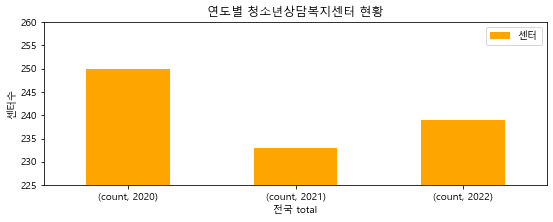

In [31]:
total2.plot(kind='bar', color=['orange'], figsize=(9,3),width=0.5)
plt.title('연도별 청소년상담복지센터 현황')
plt.xlabel('전국 total')
plt.ylabel('센터수')
plt.xticks(rotation=0)
plt.ylim([225,260])

# 청소년 도박중독 질병통계

In [611]:
# 청소년 도박문제 수준

# 보건의료빅데이터개방시스템 - 국민관심질병통계 - 도박중독
# 2017 - 2021
# xls파일데이터 불러오기
import pandas as pd
# 필요한 요소만 가져오기
data = pd.read_excel('./data/2_국민관심질병성별연령10세구간(심사년도).xls',
                     header =[6,7],
                     index_col=[0,1,2],
                    na_values=['-']) # '-'값은 결측값으로
data = data.fillna(0) # 0값으로 채우기
data

심사년도           2017년                                     2018년                 \
연령구분10세          환자수    내원일수   청구건수   요양급여비용총액   보험자부담금    환자수    내원일수   청구건수   
도박중독 계 계       1,119  14,533  4,705  1,110,642  802,194  1,205  13,722  5,212   
     남 소계      1,079  13,570  4,528  1,036,796  747,874  1,168  13,193  5,027   
       10_19세     39     482    161     46,547   33,878     64   1,096    251   
       20_29세    344   3,952  1,484    291,811  207,955    409   3,875  1,813   
       30_39세    419   3,895  1,748    287,592  203,976    418   3,969  1,679   
       40_49세    161   2,441    565    189,957  138,929    177   2,287    713   
       50_59세     87   1,488    365    128,737   96,268     74   1,119    399   
       60_69세     34     602    136     42,800   31,189     37     443    127   
       70_79세     14     710     69     49,352   35,680      9     403     44   
       80세이상       0       0      0          0        0      1       1      1   
     여 소계         40     963    177     73,846   54,320     37     529    185   
       10_19세      0       0      0          0        0      1       1      1   
       20_29세      5     149     32     14,022   10,286      5      40     38   
       30_39세      8     118     30      7,476    5,404      4       6      6   
       40_49세      5       6      6        392      274      8     209     31   
       50_59세     10     489     46     38,342   28,363     10      28     28   
       60_69세      8     180     42     12,564    9,299      5     203     39   
       70_79세      3      16     16        915      599      5      42     42   
       80세이상       1       5      5        135       95      0       0      0   

심사년도                               ...  2020년                            \
연령구분10세         요양급여비용총액   보험자부담금  ...    환자수    내원일수   청구건수   요양급여비용총액   
도박중독 계 계       1,100,828  809,956  ...  1,661  16,054  7,095  1,474,857   
     남 소계      1,059,647  779,491  ...  1,593  15,443  6,773  1,424,726   
       10_19세     98,672   72,907  ...     96     916    406     94,446   
       20_29세    309,874  225,804  ...    587   4,759  2,422    444,554   
       30_39세    320,544  235,264  ...    590   4,435  2,423    419,448   
       40_49세    194,540  145,335  ...    222   2,070    925    198,944   
       50_59세     79,273   58,273  ...    100   1,342    390    112,610   
       60_69세     30,569   23,117  ...     29     498    134     33,439   
       70_79세     26,128   18,762  ...     12   1,421     71    121,165   
       80세이상          46       28  ...      1       2      2        119   
     여 소계         41,181   30,465  ...     68     611    322     50,131   
       10_19세         30       21  ...      2      12     12        557   
       20_29세      4,545    3,370  ...     16     122     87      9,103   
       30_39세        489      326  ...     17     106     67      8,303   
       40_49세     18,953   14,219  ...     13      99     32      8,434   
       50_59세      2,026    1,371  ...      9      81     37      7,309   
       60_69세     12,642    9,442  ...     10      92     62      7,995   
       70_79세      2,496    1,716  ...      3      99     25      8,429   
       80세이상           0        0  ...      0       0      0          0   

심사년도                      2021년                                       
연령구분10세           보험자부담금    환자수    내원일수   청구건수   요양급여비용총액     보험자부담금  
도박중독 계 계       1,088,231  2,056  20,691  9,861  1,978,553  1,455,861  
     남 소계      1,050,904  1,989  20,034  9,528  1,913,344  1,408,013  
       10_19세     71,967    126   1,725    611    192,275    143,196  
       20_29세    327,469    735   7,122  3,412    696,474    510,509  
       30_39세    310,610    745   6,139  3,529    565,249    418,023  
       40_49세    143,075    264   2,421  1,264    220,278    162,057  
       50_59세     82,793     95     934    427     82,826     59,417  
       60_69세     25,390     52     493    213     43,280     31,968  
       70_79

In [612]:
# 행/열 청소년위주로 정렬

In [613]:
data.columns

MultiIndex([('2017년',      '환자수'),
            ('2017년',     '내원일수'),
            ('2017년',     '청구건수'),
            ('2017년', '요양급여비용총액'),
            ('2017년',   '보험자부담금'),
            ('2018년',      '환자수'),
            ('2018년',     '내원일수'),
            ('2018년',     '청구건수'),
            ('2018년', '요양급여비용총액'),
            ('2018년',   '보험자부담금'),
            ('2019년',      '환자수'),
            ('2019년',     '내원일수'),
            ('2019년',     '청구건수'),
            ('2019년', '요양급여비용총액'),
            ('2019년',   '보험자부담금'),
            ('2020년',      '환자수'),
            ('2020년',     '내원일수'),
            ('2020년',     '청구건수'),
            ('2020년', '요양급여비용총액'),
            ('2020년',   '보험자부담금'),
            ('2021년',      '환자수'),
            ('2021년',     '내원일수'),
            ('2021년',     '청구건수'),
            ('2021년', '요양급여비용총액'),
            ('2021년',   '보험자부담금')],
           names=['심사년도', '연령구분10세'])

In [614]:
data.drop([('2017년',     '내원일수'),
            ('2017년',     '청구건수'),
            ('2017년', '요양급여비용총액'),
            ('2017년',   '보험자부담금'),
            ('2018년',     '내원일수'),
            ('2018년',     '청구건수'),
            ('2018년', '요양급여비용총액'),
            ('2018년',   '보험자부담금'),
            ('2019년',     '내원일수'),
            ('2019년',     '청구건수'),
            ('2019년', '요양급여비용총액'),
            ('2019년',   '보험자부담금'),
            ('2020년',     '내원일수'),
            ('2020년',     '청구건수'),
            ('2020년', '요양급여비용총액'),
            ('2020년',   '보험자부담금'),
            ('2021년',     '내원일수'),
            ('2021년',     '청구건수'),
            ('2021년', '요양급여비용총액'),
            ('2021년',   '보험자부담금')],axis=1,inplace=True)

In [615]:
data.index

MultiIndex([('도박중독', '계',      '계'),
            ('도박중독', '남',     '소계'),
            ('도박중독', '남', '10_19세'),
            ('도박중독', '남', '20_29세'),
            ('도박중독', '남', '30_39세'),
            ('도박중독', '남', '40_49세'),
            ('도박중독', '남', '50_59세'),
            ('도박중독', '남', '60_69세'),
            ('도박중독', '남', '70_79세'),
            ('도박중독', '남',  '80세이상'),
            ('도박중독', '여',     '소계'),
            ('도박중독', '여', '10_19세'),
            ('도박중독', '여', '20_29세'),
            ('도박중독', '여', '30_39세'),
            ('도박중독', '여', '40_49세'),
            ('도박중독', '여', '50_59세'),
            ('도박중독', '여', '60_69세'),
            ('도박중독', '여', '70_79세'),
            ('도박중독', '여',  '80세이상')],
           )

In [616]:
data.drop([('도박중독', '계',      '계'),
            ('도박중독', '남',     '소계'),
            ('도박중독', '남', '20_29세'),
            ('도박중독', '남', '30_39세'),
            ('도박중독', '남', '40_49세'),
            ('도박중독', '남', '50_59세'),
            ('도박중독', '남', '60_69세'),
            ('도박중독', '남', '70_79세'),
            ('도박중독', '남',  '80세이상'),
            ('도박중독', '여',     '소계'),
            ('도박중독', '여', '20_29세'),
            ('도박중독', '여', '30_39세'),
            ('도박중독', '여', '40_49세'),
            ('도박중독', '여', '50_59세'),
            ('도박중독', '여', '60_69세'),
            ('도박중독', '여', '70_79세'),
            ('도박중독', '여',  '80세이상')],axis=0,inplace=True)

In [617]:
# 시각화를 위한 type변경

In [618]:
data = data.apply(pd.to_numeric)

In [619]:
data.dtypes

심사년도   연령구분10세
2017년  환자수        int64
2018년  환자수        int64
2019년  환자수        int64
2020년  환자수        int64
2021년  환자수        int64
dtype: object

In [620]:
data2 = data.T
data2

도박중독       
                   남      여
              10_19세 10_19세
심사년도  연령구분10세              
2017년 환자수         39      0
2018년 환자수         64      1
2019년 환자수         92      1
2020년 환자수         96      2
2021년 환자수        126      1

In [621]:
# 한글폰트 적용
import matplotlib.pyplot as plt
plt.rc('font',family="Malgun Gothic")
#plt.rc("font",family="AppleGothic")

#마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus']=False

Text(0.5, 1.0, '연도별 환자수')

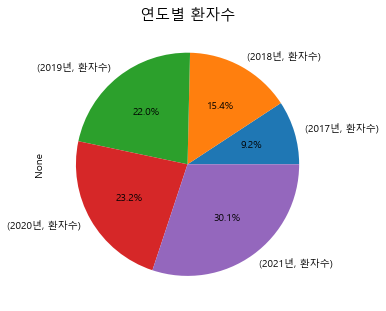

In [622]:
# 시각화해보기
data2.sum(axis=1).plot(subplots=True,figsize=(5,10), kind='pie',autopct='%1.1f%%')
plt.title('연도별 환자수',size=15)
# 5년동안 계속적으로 증가했음을 확인가능하다.

Text(0.5, 1.0, '성별 비율')

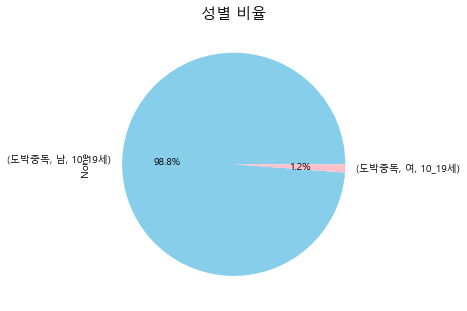

In [623]:
data2.sum(axis=0).plot(subplots=True,figsize=(5,10), kind='pie',autopct='%1.1f%%',colors=['skyblue','pink'])
plt.title('성별 비율',size=15)
# 남학생들이 도박중독 위험군임을 알 수 있다

In [624]:
#보고서에 따르면 여자청소년보다 남자청소년 문제군의 비율이 7배 이상 높게 나타난다고 한다. 이유는 무엇인가?

이러한 현상에 대해 의사와 과학자 들이 많은 관심을 보이는 부분이지만, 이를 설명하는 적확한 기전은 아직 밝혀지지 않았다. 
여성 호르몬의 영향이 있을 것으로 추정되고 있다. 
여성의 경우 도박장애에 걸릴 확률이 떨어지긴 하지만 걸린 경우에는 진행 속도가 빠르고 회복이 더 어렵다고 보고되고 있는데, 
이를 설명하는 과학적 이유가 아직 정확하게 밝혀지지 않았다

출처 : 《춘천사람들》 - 시민과 동행하는 신문 (http://www.chunsa.kr)

SyntaxError: invalid syntax (4277398469.py, line 3)

Text(0, 0.5, '도박중독 환자수')

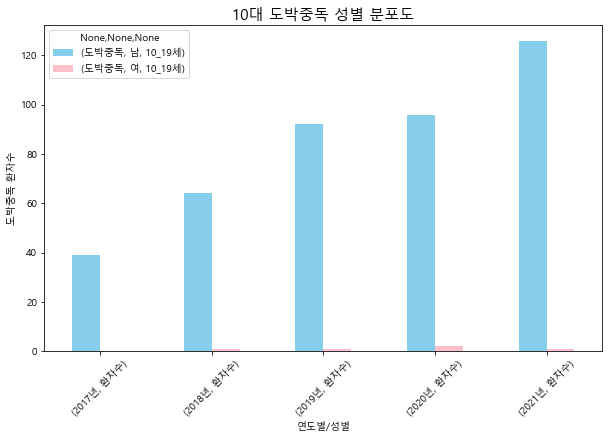

In [625]:
# 최근 5년간 급증
data2.plot(kind='bar', color=['skyblue','pink'], figsize=(10,6))
plt.title("10대 도박중독 성별 분포도",fontsize=15)
plt.xticks(rotation=45)
plt.xlabel('연도별/성별')
plt.ylabel('도박중독 환자수')

In [626]:
# 2017년대비 2021년 증가율
data['증가율(%)']=(data[('2021년', '환자수')]-data[('2017년', '환자수')])/data[('2017년', '환자수')]*100
data

심사년도          2017년 2018년 2019년 2020년 2021년 증가율(%)
연령구분10세         환자수   환자수   환자수   환자수   환자수       
도박중독 남 10_19세    39    64    92    96   126 223.08
     여 10_19세     0     1     1     2     1    inf

# 청소년종합실태조사

In [627]:
# 도박문제에 대한 청소년들의 인식

# KOSIS 국가통계포털 - 청소년종합실태조사 - 도박 문제의 심각성
# xls파일데이터 불러오기
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# 멀티인덱스 지정
danger = pd.read_excel('./data/도박_문제의_심각성_20220731002336.xlsx',
                     header =[0,1,2], # 컬럼명 위치
                     index_col=[0,1,2] # 로우명 위치
                    )
danger

특성별(3)            2019                            2021                        
특성별(3)         심각하지 않다          보통  심각하다       심각하지 않다          보통  심각하다      
특성별(3)              전혀    별로    소계    다소    매우      전혀    별로    소계    다소    매우
합계   소계   소계      1.60  8.50 25.50 37.60 26.80    1.40  8.10 24.10 37.90 28.50
성별   남자   소계      2.10  9.40 26.80 34.00 27.80    2.10 10.20 24.60 35.80 27.40
     여자   소계      1.00  7.50 24.00 41.80 25.60    0.80  6.10 23.50 40.00 29.60
학교급별 중학생  소계      1.60  7.20 25.00 37.00 29.20    1.30  9.00 26.60 35.90 27.30
          남자      1.90  7.10 26.80 35.00 29.10    2.10 11.50 26.80 33.80 25.80
          여자      1.20  7.40 22.90 39.40 29.20    0.40  6.40 26.30 38.00 28.90
     고등학생 소계      1.60  9.90 26.10 38.20 24.30    1.60  7.40 21.90 39.60 29.50
          남자      2.20 11.70 26.80 32.80 26.40    2.10  9.00 22.60 37.50 28.90
          여자      0.90  7.60 25.20 44.60 21.70    1.10  5.90 21.20 41.60 30.10
동권역  소계   소계      1.90  7.50 27.20 38.00 25.40    1.50  8.80 23.50 38.10 28.00
     성별   남자      2.40  8.50 26.90 34.10 28.10    2.00 10.90 23.60 36.70 26.70
          여자      1.30  6.00 27.70 43.50 21.50    1.00  6.50 23.40 39.60 29.50
     학교급별 중학생     2.00  6.60 27.40 37.70 26.30    1.10  8.90 24.00 37.80 28.30
          고등학생    1.90  8.30 27.10 38.20 24.60    2.00  8.70 23.10 38.50 27.80
읍면권역 소계   소계      1.50  8.90 24.90 34.60 30.20    1.70  6.40 20.10 35.80 35.90
     성별   남자      2.30 10.40 27.70 32.40 27.20    1.50  5.60 19.50 38.90 34.50
          여자      0.60  7.30 21.80 37.00 33.30    1.80  7.20 20.70 33.00 37.20
     학교급별 중학생     1.40  6.50 21.50 36.00 34.60    1.70  5.60 24.70 37.20 30.70
          고등학생    1.60 12.90 30.60 32.30 22.60    1.70  6.70 18.50 35.30 37.80
장유권역 소계   소계      1.20  9.50 23.80 38.40 27.00    1.20  7.70 25.70 38.00 27.40
     성별   남자      1.50 10.10 26.30 34.40 27.60    2.30 10.20 27.20 33.60 26.70
          여자      1.00  9.00 21.40 42.20 26.50    0.30  5.40 24.30 42.00 28.00
     학교급별 중학생     1.20  8.30 24.10 36.80 29.50    1.40  9.60 30.40 33.00 25.50
          고등학생    1.30 10.80 23.40 40.10 24.40    1.00  6.00 21.50 42.50 29.00

In [628]:
# 필요한 요소로 행/열 정리
danger.index

MultiIndex([(  '합계',   '소계',   '소계'),
            (  '성별',   '남자',   '소계'),
            (  '성별',   '여자',   '소계'),
            ('학교급별',  '중학생',   '소계'),
            ('학교급별',  '중학생',   '남자'),
            ('학교급별',  '중학생',   '여자'),
            ('학교급별', '고등학생',   '소계'),
            ('학교급별', '고등학생',   '남자'),
            ('학교급별', '고등학생',   '여자'),
            ( '동권역',   '소계',   '소계'),
            ( '동권역',   '성별',   '남자'),
            ( '동권역',   '성별',   '여자'),
            ( '동권역', '학교급별',  '중학생'),
            ( '동권역', '학교급별', '고등학생'),
            ('읍면권역',   '소계',   '소계'),
            ('읍면권역',   '성별',   '남자'),
            ('읍면권역',   '성별',   '여자'),
            ('읍면권역', '학교급별',  '중학생'),
            ('읍면권역', '학교급별', '고등학생'),
            ('장유권역',   '소계',   '소계'),
            ('장유권역',   '성별',   '남자'),
            ('장유권역',   '성별',   '여자'),
            ('장유권역', '학교급별',  '중학생'),
            ('장유권역', '학교급별', '고등학생')],
           )

In [629]:
danger.drop([ ( '동권역',   '소계',   '소계'),
            ( '동권역',   '성별',   '남자'),
            ( '동권역',   '성별',   '여자'),
            ( '동권역', '학교급별',  '중학생'),
            ( '동권역', '학교급별', '고등학생'),
            ('읍면권역',   '소계',   '소계'),
            ('읍면권역',   '성별',   '남자'),
            ('읍면권역',   '성별',   '여자'),
            ('읍면권역', '학교급별',  '중학생'),
            ('읍면권역', '학교급별', '고등학생'),
            ('장유권역',   '소계',   '소계'),
            ('장유권역',   '성별',   '남자'),
            ('장유권역',   '성별',   '여자'),
            ('장유권역', '학교급별',  '중학생'),
            ('장유권역', '학교급별', '고등학생')],axis=0,inplace=True)

In [630]:
danger

특성별(3)          2019                            2021                        
특성별(3)       심각하지 않다          보통  심각하다       심각하지 않다          보통  심각하다      
특성별(3)            전혀    별로    소계    다소    매우      전혀    별로    소계    다소    매우
합계   소계   소계    1.60  8.50 25.50 37.60 26.80    1.40  8.10 24.10 37.90 28.50
성별   남자   소계    2.10  9.40 26.80 34.00 27.80    2.10 10.20 24.60 35.80 27.40
     여자   소계    1.00  7.50 24.00 41.80 25.60    0.80  6.10 23.50 40.00 29.60
학교급별 중학생  소계    1.60  7.20 25.00 37.00 29.20    1.30  9.00 26.60 35.90 27.30
          남자    1.90  7.10 26.80 35.00 29.10    2.10 11.50 26.80 33.80 25.80
          여자    1.20  7.40 22.90 39.40 29.20    0.40  6.40 26.30 38.00 28.90
     고등학생 소계    1.60  9.90 26.10 38.20 24.30    1.60  7.40 21.90 39.60 29.50
          남자    2.20 11.70 26.80 32.80 26.40    2.10  9.00 22.60 37.50 28.90
          여자    0.90  7.60 25.20 44.60 21.70    1.10  5.90 21.20 41.60 30.10

In [631]:
danger = danger.apply(pd.to_numeric)

In [632]:
danger_total=danger.loc[['합계']]
danger_total

특성별(3)      2019                           2021                       
특성별(3)   심각하지 않다         보통  심각하다       심각하지 않다         보통  심각하다      
특성별(3)        전혀   별로    소계    다소    매우      전혀   별로    소계    다소    매우
합계 소계 소계    1.60 8.50 25.50 37.60 26.80    1.40 8.10 24.10 37.90 28.50

In [12]:
danger3=pd.DataFrame({'2019':['1.6','8.5','25.5','37.6','26.8'],
                      '2021':['1.4','8.1','24.1','37.9','28.5']},
                    index=['심각하지 않다-전혀','심각하지 않다-별로','보통','심각하다-다소','심각하다-매우'])
danger3

,2019,2021
심각하지 않다-전혀,1.6,1.4
심각하지 않다-별로,8.5,8.1
보통,25.5,24.1
심각하다-다소,37.6,37.9
심각하다-매우,26.8,28.5


In [15]:
danger3 = danger3.apply(pd.to_numeric)

In [16]:
# 한글폰트 적용
import matplotlib.pyplot as plt
plt.rc('font',family="Malgun Gothic")
#plt.rc("font",family="AppleGothic")

#마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus']=False

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '심각하지 않다-전혀'),
  Text(1, 0, '심각하지 않다-별로'),
  Text(2, 0, '보통'),
  Text(3, 0, '심각하다-다소'),
  Text(4, 0, '심각하다-매우')])

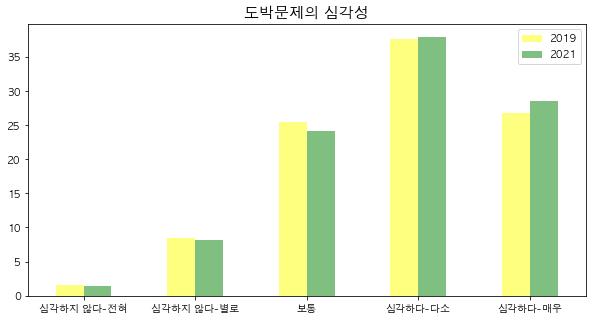

In [24]:
danger3.plot(kind='bar', color=['yellow','green'], figsize=(10,5), alpha=0.5)
plt.title("도박문제의 심각성",fontsize=15)
plt.xticks(rotation=0)

# 도박중독 예방교육 실시율

In [634]:
https://mobile.newsis.com/view.html?ar_id=NISX20181210_0000497947
출처 - '한탕주의'에 빠진 학생들…충북 청소년 도박 위험수위

SyntaxError: invalid syntax (2590327508.py, line 1)

In [635]:
# 도박중독 예방교육 실시율표 확인

# 뉴스기사 본문 이미지 가져오기

import requests as rq
from bs4 import BeautifulSoup
headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'}

url ='https://mobile.newsis.com/view.html?ar_id=NISX20181210_0000497947'
r = rq.get(url,headers=headers).text
bs = BeautifulSoup(r,'lxml')

target = bs.select_one('#imgartitable_NISI20181210_0000242154 > img')

#print(target)

print('https:'+target['src'])

https://image.newsis.com/2018/12/10/NISI20181210_0000242154_web.jpg?rnd=20181210141659
